<a href="https://colab.research.google.com/github/Ah1s/T5/blob/main/Weekly_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [65]:
df= pd.read_csv('/content/drive/MyDrive/py/Week 2/2 - Foundations of Machine Learning/5- Weekly Project/RTA_Dataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4183 entries, 1 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         4183 non-null   object
 1   Day_of_week                  4183 non-null   object
 2   Age_band_of_driver           4183 non-null   object
 3   Sex_of_driver                4183 non-null   object
 4   Educational_level            4183 non-null   object
 5   Vehicle_driver_relation      4183 non-null   object
 6   Driving_experience           4183 non-null   object
 7   Type_of_vehicle              4183 non-null   object
 8   Owner_of_vehicle             4183 non-null   object
 9   Service_year_of_vehicle      4183 non-null   object
 10  Defect_of_vehicle            4183 non-null   object
 11  Area_accident_occured        4183 non-null   object
 12  Lanes_or_Medians             4183 non-null   object
 13  Road_allignment              4183 non

In [67]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [68]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [156]:
df.sample()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
821,8:27:00,Wednesday,18-30,Male,Writing & reading,Employee,2-5yr,Lorry (41?100Q),Owner,1-2yr,...,Moving Backward,Driver or rider,Female,Under 18,3,Driver,Normal,Not a Pedestrian,No distancing,Serious Injury


## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [69]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [70]:
df.duplicated().sum()

0

In [147]:
df["Casualty_class"].mode()

,Casualty_class
0,Driver or rider


In [161]:
df["Day_of_week"].value_counts()

,count
Day_of_week,
Friday,678
Saturday,651
Thursday,623
Tuesday,614
Wednesday,588
Monday,543
Sunday,486


In [160]:
df["Time"].value_counts()

,count
Time,
15:30:00,40
11:30:00,40
17:10:00,40
17:00:00,38
16:00:00,37
19:00:00,36
18:00:00,36
17:35:00,33
16:30:00,33


In [145]:
df['Casualty_severity'] = df['Casualty_severity'].replace('na', np.nan)
df['Age_band_of_casualty'] = df['Age_band_of_casualty'].replace('na', np.nan)
df['Sex_of_casualty'] = df['Sex_of_casualty'].replace('na', np.nan)


<ipython-input-145-37f5466835aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Casualty_severity'] = df['Casualty_severity'].replace('na', np.nan)
<ipython-input-145-37f5466835aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_band_of_casualty'] = df['Age_band_of_casualty'].replace('na', np.nan)
<ipython-input-145-37f5466835aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [152]:
print(df['Number_of_casualties'].unique())

[2 1 3 4 6 5 8 7]


In [150]:
df.drop(df[df["Sex_of_driver"] == "Unknown"].index, inplace=True)

df.drop(df[df["Types_of_Junction"] == "Unknown"].index, inplace=True)

df.drop(df[df["Lanes_or_Medians"] == "Unknown"].index, inplace=True)

df.drop(df[df["Cause_of_accident"] == "Unknown"].index, inplace=True)

df.drop(df[df["Work_of_casuality"] == "Unknown"].index, inplace=True)

df.drop(df[df["Number_of_casualties"] == "Unknown"].index, inplace=True)




<ipython-input-150-894847642f00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df["Sex_of_driver"] == "Unknown"].index, inplace=True)
<ipython-input-150-894847642f00>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df["Types_of_Junction"] == "Unknown"].index, inplace=True)
<ipython-input-150-894847642f00>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df["Lanes_or_Medians"] == "Unknown"].index, in

In [122]:
df.dropna(subset="Educational_level", inplace=True)
df["Driving_experience"].fillna(df["Driving_experience"].mode()[0], inplace=True)
df.dropna(subset="Defect_of_vehicle", inplace=True)
df['Area_accident_occured'].fillna("mountainous areas", inplace=True)
df.dropna(subset="Type_of_vehicle", inplace=True)
df["Vehicle_driver_relation"].fillna(df["Vehicle_driver_relation"].mode()[0], inplace=True)
df["Owner_of_vehicle"].fillna(df["Owner_of_vehicle"].mode()[0], inplace=True)
df.dropna(subset="Service_year_of_vehicle", inplace=True)
df["Work_of_casuality"].fillna(df["Work_of_casuality"].mode()[0], inplace=True)
df["Fitness_of_casuality"].fillna(df["Fitness_of_casuality"].mode()[0], inplace=True)
df["Vehicle_movement"].fillna(df["Vehicle_movement"].mode()[0], inplace=True)
df["Type_of_collision"].fillna(df["Type_of_collision"].mode()[0], inplace=True)
df.dropna(subset="Road_surface_type", inplace=True)
df.dropna(subset="Lanes_or_Medians", inplace=True)
df["Road_allignment"].fillna(df["Road_allignment"].mode()[0], inplace=True)


<ipython-input-122-f689809e41f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset="Educational_level", inplace=True)
<ipython-input-122-f689809e41f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Driving_experience"].fillna(df["Driving_experience"].mode()[0], inplace=True)
<ipython-input-122-f689809e41f6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset="Defect_of_vehicle", inplace=True)
<ipytho

In [125]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Service_year_of_vehicle,0


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4183 entries, 1 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         4183 non-null   object
 1   Day_of_week                  4183 non-null   object
 2   Age_band_of_driver           4183 non-null   object
 3   Sex_of_driver                4183 non-null   object
 4   Educational_level            4183 non-null   object
 5   Vehicle_driver_relation      4183 non-null   object
 6   Driving_experience           4183 non-null   object
 7   Type_of_vehicle              4183 non-null   object
 8   Owner_of_vehicle             4183 non-null   object
 9   Service_year_of_vehicle      4183 non-null   object
 10  Defect_of_vehicle            4183 non-null   object
 11  Area_accident_occured        4183 non-null   object
 12  Lanes_or_Medians             4183 non-null   object
 13  Road_allignment              4183 non

In [163]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

print(df.head())

    Time  Day_of_week  Age_band_of_driver  Sex_of_driver  Educational_level  \
1    333            1                   1              1                  4   
7    350            0                   0              1                  4   
8    350            0                   0              1                  4   
9    350            0                   0              1                  4   
10   228            2                   0              1                  0   

    Vehicle_driver_relation  Driving_experience  Type_of_vehicle  \
1                         0                   3               11   
7                         0                   1                0   
8                         0                   3                5   
9                         0                   0                0   
10                        2                   0               10   

    Owner_of_vehicle  Service_year_of_vehicle  ...  Vehicle_movement  \
1                  3                        

<ipython-input-163-847c347e7284>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
<ipython-input-163-847c347e7284>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
<ipython-input-163-847c347e7284>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4183 entries, 1 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Time                         4183 non-null   int64
 1   Day_of_week                  4183 non-null   int64
 2   Age_band_of_driver           4183 non-null   int64
 3   Sex_of_driver                4183 non-null   int64
 4   Educational_level            4183 non-null   int64
 5   Vehicle_driver_relation      4183 non-null   int64
 6   Driving_experience           4183 non-null   int64
 7   Type_of_vehicle              4183 non-null   int64
 8   Owner_of_vehicle             4183 non-null   int64
 9   Service_year_of_vehicle      4183 non-null   int64
 10  Defect_of_vehicle            4183 non-null   int64
 11  Area_accident_occured        4183 non-null   int64
 12  Lanes_or_Medians             4183 non-null   int64
 13  Road_allignment              4183 non-null   int64
 

In [167]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
1,333,1,1,1,4,0,3,11,3,2,...,2,3,2,5,3,0,2,5,16,2
7,350,0,0,1,4,0,1,0,0,3,...,10,3,2,5,3,0,2,5,12,2
8,350,0,0,1,4,0,3,5,3,0,...,2,2,1,4,2,0,2,0,1,2
9,350,0,0,1,4,0,0,0,3,1,...,10,1,1,0,2,0,2,5,9,1
10,228,2,0,1,0,2,0,10,3,5,...,9,3,2,5,3,0,2,5,0,1


## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

In [176]:
corr_df=df[['Accident_severity','Age_band_of_driver','Work_of_casuality','Vehicle_movement','Number_of_vehicles_involved','Number_of_casualties','Day_of_week']].corr()

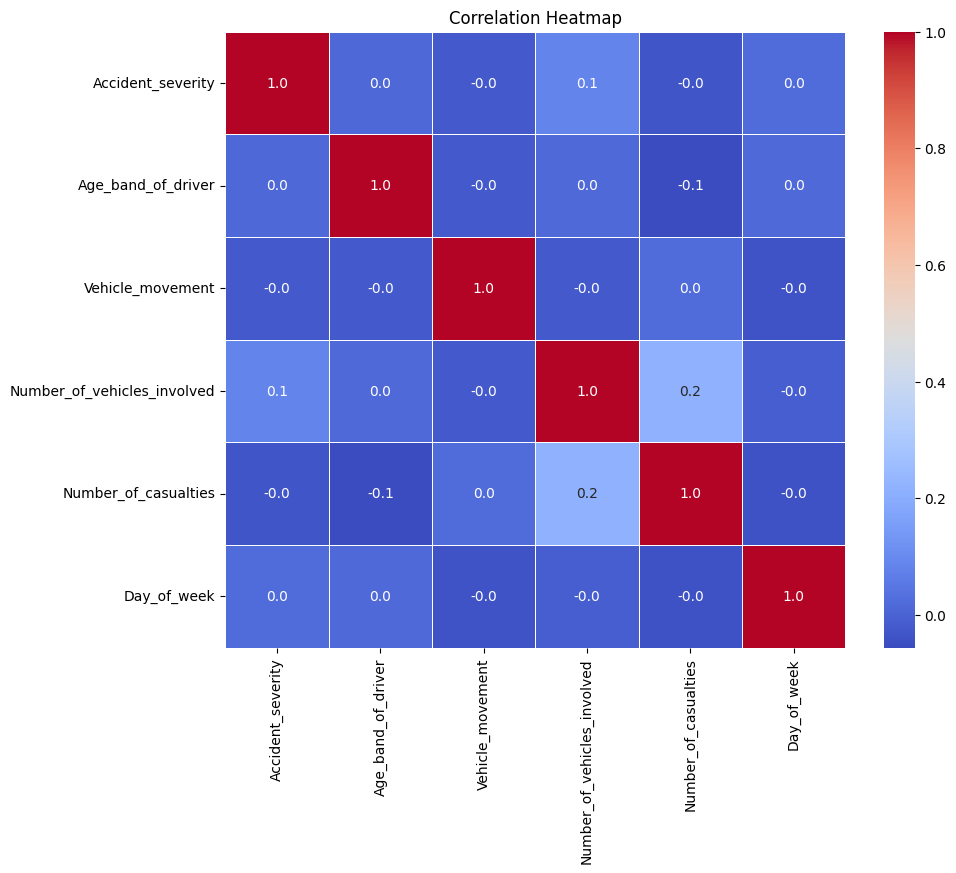

In [175]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.1f',linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

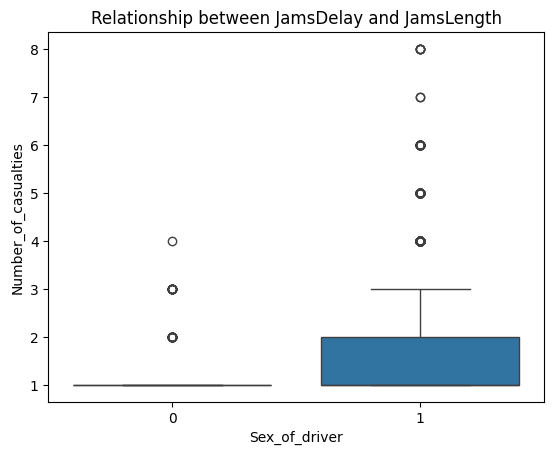

In [177]:
sns.boxplot(x='Sex_of_driver', y='Number_of_casualties', data=df);
plt.xlabel('Sex_of_driver')
plt.ylabel('Number_of_casualties')
plt.title('Relationship between Sex of driver and Number of casualties')
plt.show()

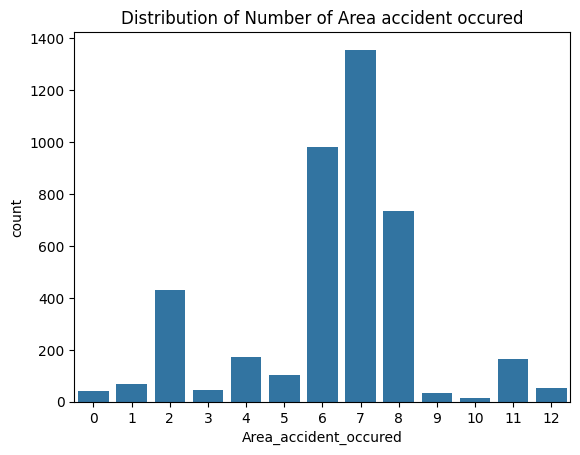

In [178]:
sns.countplot(x = "Area_accident_occured", data=df)
plt.xlabel('Area_accident_occured')
plt.ylabel('count')
plt.title('Distribution of Number of Area accident occured')
plt.show()

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

df['Accident_severity'] = df['Accident_severity'].astype('category')

target = 'Accident_severity'

features = [ 'Age_band_of_driver', 'Work_of_casuality',
            'Vehicle_movement', 'Number_of_vehicles_involved', 'Number_of_casualties', 'Day_of_week']

X = df[features]

y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

#### Decision Tree Classifier

In [186]:
model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#### Support Vector Machine (SVM)

#### K-Neighbors Classifier

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [187]:
accuracy = accuracy_score(y_test, y_pred)

prescision = precision_score(y_test, y_pred, average='weighted')

recall = recall_score(y_test, y_pred, average='weighted')

f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Prescision: {prescision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')



Accuracy: 0.7921146953405018
Prescision: 0.7526837887754203
Recall: 0.7921146953405018
F1 Score: 0.7694056230290028


## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: